In [ ]:
!unzip "/content/drive/MyDrive/samples.zip" -d "/content/drive/MyDrive/captcha"

Archive:  /content/drive/MyDrive/samples.zip
 extracting: /content/drive/MyDrive/captcha/samples/226md.png  
 extracting: /content/drive/MyDrive/captcha/samples/22d5n.png  
 extracting: /content/drive/MyDrive/captcha/samples/2356g.png  
 extracting: /content/drive/MyDrive/captcha/samples/23mdg.png  
 extracting: /content/drive/MyDrive/captcha/samples/23n88.png  
 extracting: /content/drive/MyDrive/captcha/samples/243mm.png  
  inflating: /content/drive/MyDrive/captcha/samples/244e2.png  
  inflating: /content/drive/MyDrive/captcha/samples/245y5.png  
 extracting: /content/drive/MyDrive/captcha/samples/24f6w.png  
 extracting: /content/drive/MyDrive/captcha/samples/24pew.png  
 extracting: /content/drive/MyDrive/captcha/samples/25257.png  
  inflating: /content/drive/MyDrive/captcha/samples/253dc.png  
 extracting: /content/drive/MyDrive/captcha/samples/25egp.png  
 extracting: /content/drive/MyDrive/captcha/samples/25m6p.png  
 extracting: /content/drive/MyDrive/captcha/samples/25p2m.p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
path1 = '/content/drive/MyDrive/captcha/samples/22d5n.png'
path2 = '/content/drive/MyDrive/captcha/samples/2356g.png'

In [ ]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')

In [ ]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

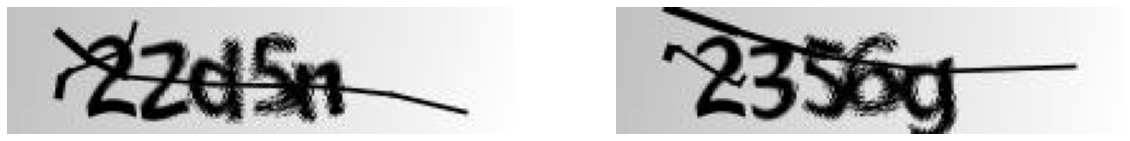

In [ ]:
plot_(img1, img2)

In [ ]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

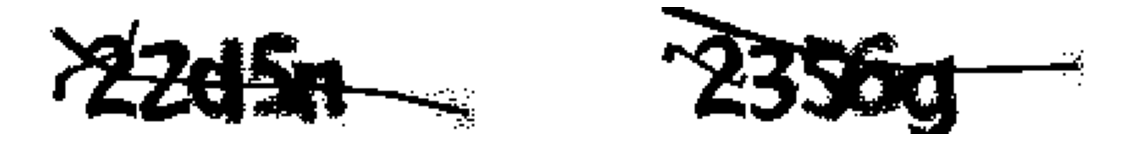

In [ ]:
plot_(thresh_img1, thresh_img2)

In [ ]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

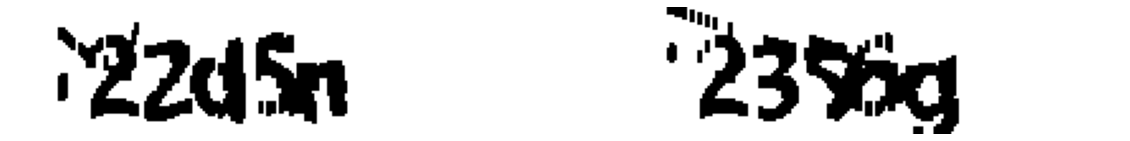

In [ ]:
plot_(close_img1, close_img2)

In [ ]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

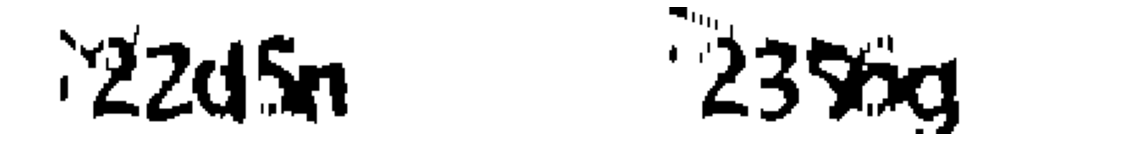

In [ ]:
plot_(dilate_img1, dilate_img2)

In [ ]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

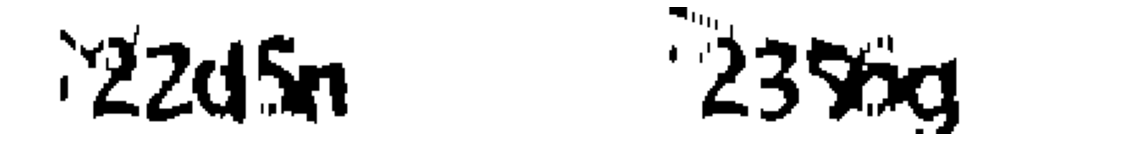

In [ ]:
plot_(gauss_img1, gauss_img2)

In [ ]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

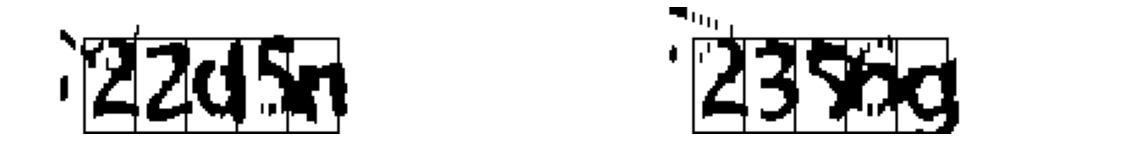

In [ ]:
plot_(gauss_img1, gauss_img2)

In [ ]:
path = '/content/drive/MyDrive/captcha/samples'

In [ ]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [ ]:
import os
from PIL import Image
from keras_preprocessing.image import img_to_array, ImageDataGenerator

In [ ]:
X = []
y = []

for image in os.listdir(path) :
    
    if image[6:] != 'png' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [ ]:
X /= 255.0

TypeError: ignored

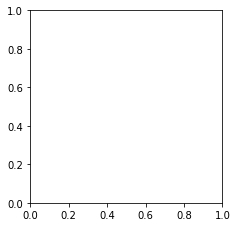

In [ ]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of e : 235
Occurance count of b : 240
Occurance count of 5 : 281
Occurance count of 8 : 264
Occurance count of p : 253
Occurance count of 7 : 258
Occurance count of w : 235
Occurance count of n : 525
Occurance count of c : 262
Occurance count of 3 : 267
Occurance count of f : 271
Occurance count of g : 271
Occurance count of 6 : 259
Occurance count of 4 : 284
Occurance count of 2 : 265
Occurance count of y : 232
Occurance count of d : 259
Occurance count of m : 275
Occurance count of x : 264


In [ ]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

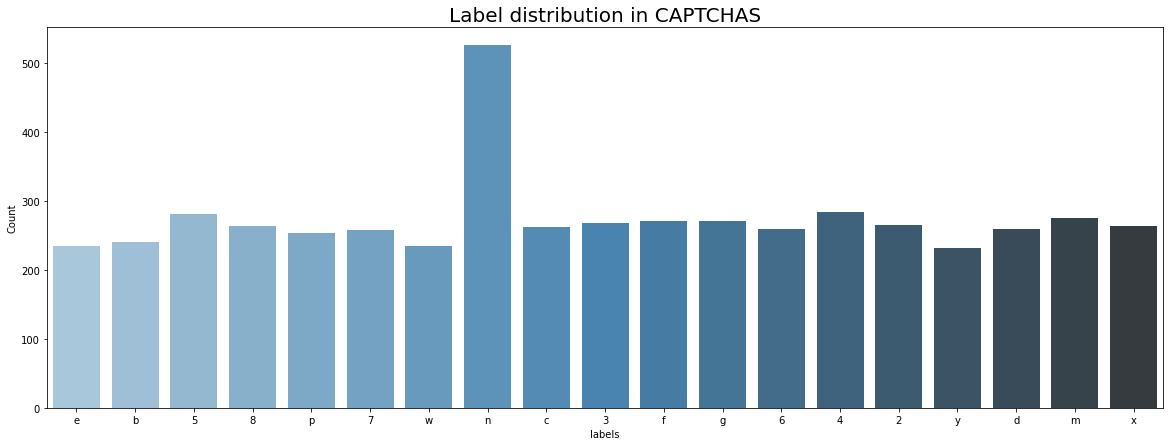

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [ ]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 3
label : 1
Count : 267


In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [ ]:
print(X.shape)
print(y_one_hot.shape)

(5200, 40, 20, 1)
(5200, 19)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [ ]:
y_temp = np.argmax(y_test, axis = 1)

In [ ]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in test set')

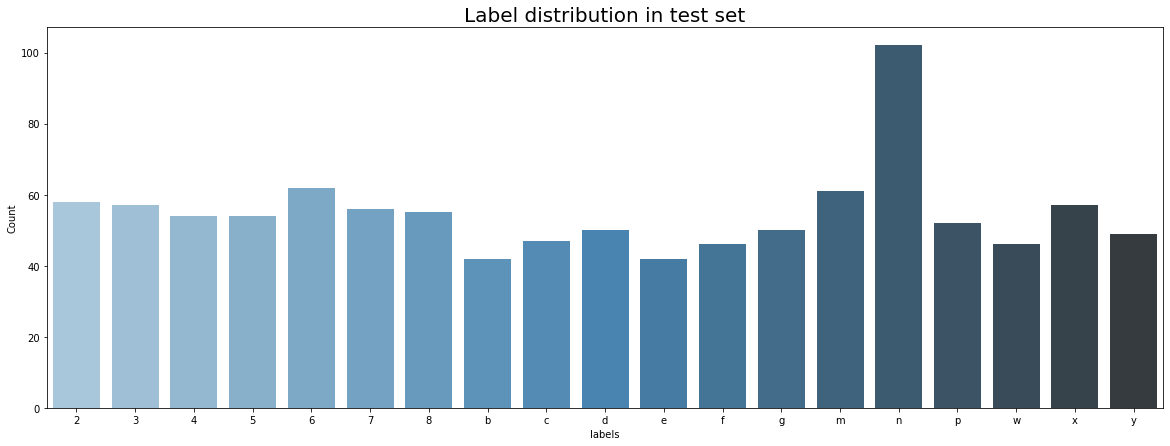

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [ ]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

In [ ]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [ ]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    
    model.add(Dense(19, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model


In [ ]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8037, 800)
(8037, 19)


In [ ]:
X_train = np.reshape(X_train, (8037, 40, 20, 1))

TypeError: ignored

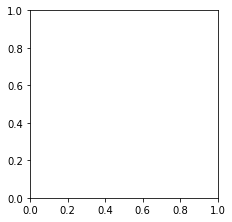

In [ ]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

In [ ]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [ ]:
train_set = traingen.flow(X_train, y_train)

In [ ]:
trainX, trainy = train_set.next()

TypeError: ignored

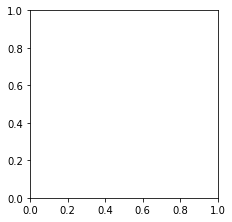

In [ ]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 20, 10, 128)       1792      
                                                                 
 sequential_2 (Sequential)   (None, 10, 5, 32)         37024     
                                                                 
 sequential_3 (Sequential)   (None, 5, 3, 16)          4688      
                                                                 
 flatten (Flatten)           (None, 240)               0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                7840      
                                                                 
 sequential_5 (Sequential)   (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 19)                6

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model1.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [ ]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8037, 40, 20, 1)
(8037, 19)


In [ ]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/150
249/251 [============================>.] - ETA: 0s - loss: 2.3584 - accuracy: 0.3109
Epoch 1: val_loss improved from inf to 2.91882, saving model to ./result_model1.h5
251/251 [==============================] - 14s 15ms/step - loss: 2.3525 - accuracy: 0.3126 - val_loss: 2.9188 - val_accuracy: 0.1481
Epoch 2/150
248/251 [============================>.] - ETA: 0s - loss: 1.3645 - accuracy: 0.6109
Epoch 2: val_loss improved from 2.91882 to 1.81237, saving model to ./result_model1.h5
251/251 [==============================] - 3s 14ms/step - loss: 1.3605 - accuracy: 0.6118 - val_loss: 1.8124 - val_accuracy: 0.4029
Epoch 3/150
249/251 [============================>.] - ETA: 0s - loss: 1.0055 - accuracy: 0.7141
Epoch 3: val_loss improved from 1.81237 to 0.77413, saving model to ./result_model1.h5
251/251 [==============================] - 3s 14ms/step - loss: 1.0031 - accuracy: 0.7149 - val_loss: 0.7741 - val_accuracy: 0.7702
Epoch 4/150
250/251 [============================>.] - 

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

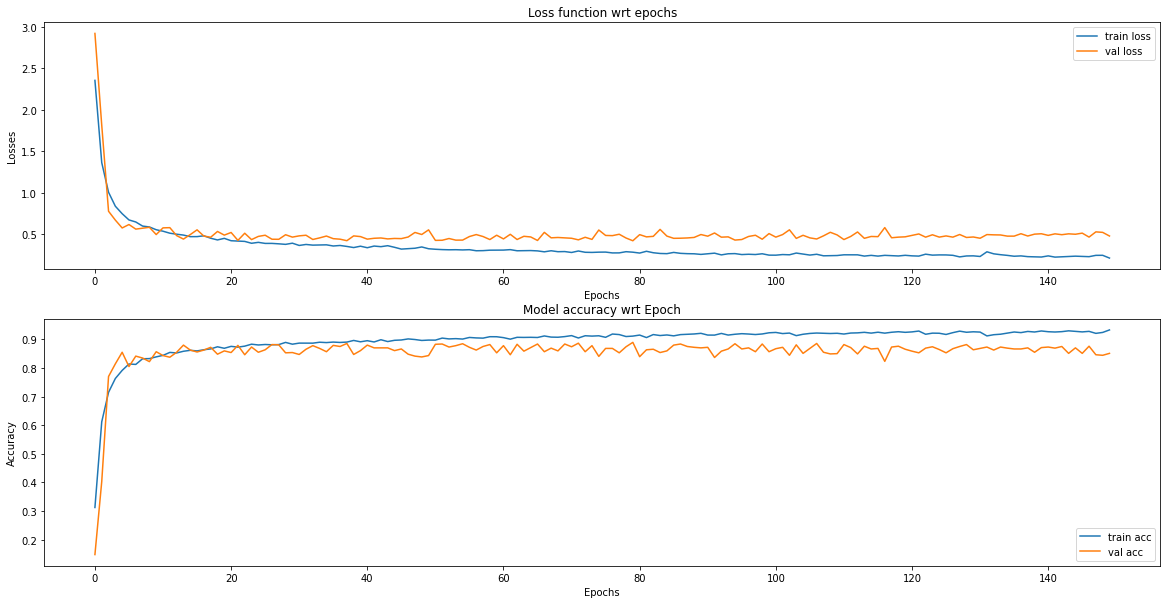

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/result_model (1).h5')

In [ ]:
pred = model.predict(X_test)

33/33 [==============================] - 1s 28ms/step


In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [ ]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.9096153846153846
              precision    recall  f1-score   support

           2       0.85      0.95      0.89        58
           3       1.00      0.96      0.98        57
           4       0.98      0.98      0.98        54
           5       1.00      0.93      0.96        54
           6       0.98      0.95      0.97        62
           7       0.98      0.93      0.95        56
           8       0.93      0.96      0.95        55
           b       0.95      1.00      0.98        42
           c       0.98      0.87      0.92        47
           d       0.81      0.96      0.88        50
           e       1.00      0.93      0.96        42
           f       0.91      0.93      0.92        46
           g       0.98      0.98      0.98        50
           m       0.82      0.59      0.69        61
           n       0.75      0.78      0.77       102
           p       0.84      0.92      0.88        52
           w       0.82      0.89      0.85        

In [ ]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])


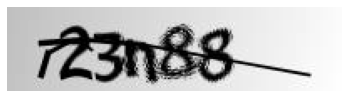

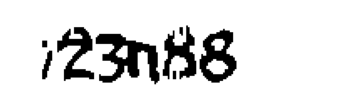

1/1 [==============================] - 0s 22ms/step
2
3
n
8
8
23n88.png


In [ ]:
get_demo('/content/drive/MyDrive/captcha/samples/23n88.png')

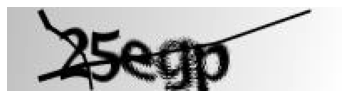

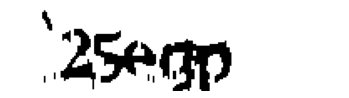

1/1 [==============================] - 0s 73ms/step
2
5
e
g
p
25egp.png


In [ ]:
get_demo('/content/drive/MyDrive/captcha/samples/25egp.png')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/result_model1.h5')

In [ ]:
pred = model.predict(X_test)

33/33 [==============================] - 1s 28ms/step


In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [ ]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8894230769230769
              precision    recall  f1-score   support

           2       0.89      0.95      0.92        58
           3       0.98      0.93      0.95        57
           4       0.98      0.93      0.95        54
           5       0.89      0.93      0.91        54
           6       0.92      0.90      0.91        62
           7       0.94      0.89      0.92        56
           8       0.98      0.95      0.96        55
           b       0.95      0.98      0.96        42
           c       0.93      0.83      0.88        47
           d       0.87      0.90      0.88        50
           e       0.90      0.86      0.88        42
           f       0.91      0.93      0.92        46
           g       0.96      1.00      0.98        50
           m       0.86      0.49      0.62        61
           n       0.69      0.90      0.78       102
           p       0.89      0.92      0.91        52
           w       0.76      0.85      0.80        

In [ ]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])


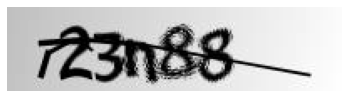

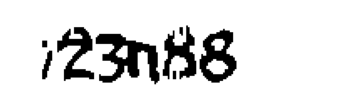

1/1 [==============================] - 0s 28ms/step
2
3
n
8
8
23n88.png


In [ ]:
get_demo('/content/drive/MyDrive/captcha/samples/23n88.png')

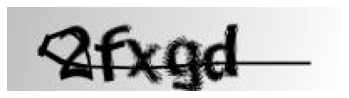

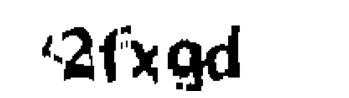

1/1 [==============================] - 0s 31ms/step
2
f
x
g
d
2fxgd.png


In [ ]:
get_demo('/content/drive/MyDrive/captcha/samples/2fxgd.png')

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/captcha/capctha.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray

array([[208, 254, 253, ..., 253, 251, 252],
       [255, 246, 255, ..., 251, 255, 253],
       [250, 212, 254, ..., 254, 253, 251],
       ...,
       [254, 255, 253, ..., 253, 202, 255],
       [254, 254, 253, ..., 255, 254, 252],
       [255, 254, 254, ..., 255, 251, 206]], dtype=uint8)

In [ ]:
import cv2
from IPython.display import Image

# Load the color image
img = cv2.imread('/content/drive/MyDrive/captcha/capctha.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Save the grayscale image
cv2.imwrite('gray_image.jpg', gray)

# Open the grayscale image
gray = Image.open('gray_image.jpg')

# Display the image
display(gray)


AttributeError: ignored

In [ ]:
import PIL.Image
fp = open("gray_image.jpg","rb")
img = PIL.Image.open(fp)
img.show()

FileNotFoundError: ignored

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/captcha/capctha.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
def plot_ (img1) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')

In [ ]:



img3 = cv2.imread('/content/pop.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gray_image.jpg', img3)

True

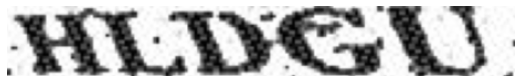

In [ ]:
plot_(img3)

In [ ]:
cv2.rectangle(img3, (30,12), (50,49), 0, 1)
cv2.rectangle(img3, (50,12), (70,49), 0, 1)
cv2.rectangle(img3, (70,12), (90,49), 0, 1)
cv2.rectangle(img3, (90,12), (110,49),0, 1)
cv2.rectangle(img3, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 254, 253, 252],
       [254, 254, 254, ..., 252, 252, 252],
       [249, 252, 252, ..., 248, 251, 252],
       ...,
       [ 42,  50,  63, ..., 137, 211, 252],
       [ 66,  76,  88, ..., 125, 207, 253],
       [162, 171, 177, ..., 119, 205, 252]], dtype=uint8)

In [ ]:
from PIL import Image

# Open the image
img = Image.open('/content/pop.png')

# Resize the image
resized_img = img3.resize((200, 50))

ValueError: ignored

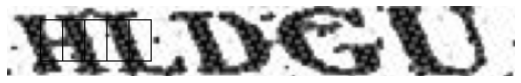

In [ ]:
plot_(img3)

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/captcha/capctha.jpg')
height, width, channels = img.shape
print(f"Image size: {width}x{height}")

Image size: 200x70


In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/captcha/samples/244e2.png')
height, width, channels = img.shape
print(f"Image size: {width}x{height}")

Image size: 200x50


In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread('/content/gray_image.jpg')

# Resize the image
resized_img = cv2.resize(img, (200, 50))
resized_img.save('resized_image.png', format='PNG')
plt.imshow(resized_img)
plt.show()

error: ignored

In [ ]:
from PIL import Image

# Open the image
# img = Image.open('/content/pop.png')

# # Resize the image
# resized_img = img.resize((200, 50))
# plot_(resized_img)
# # # Save the resized image to disk
# resized_img.save('resized_image2.jpg')

import cv2

# Load the image
img = cv2.imread('/content/drive/MyDrive/pop.png')

# Resize the image
width = 200
height = 50
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)

# Save the resized image
cv2.imwrite('resized_imagepop.jpg', resized)


True

In [ ]:
img3 = cv2.imread('/content/resized_imagepop.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
plot_(img3)

NameError: ignored

In [ ]:
cv2.rectangle(img3, (10,20), (35,35), 0, 1)
cv2.rectangle(img3, (35,20), (70,35), 0, 1)
cv2.rectangle(img3, (70,20), (90,35), 0, 1)
cv2.rectangle(img3, (90,20), (110,35),0, 1)
cv2.rectangle(img3, (110,20),(130,35),0, 1)

array([[255, 253, 247, ..., 253, 253, 253],
       [253, 255, 251, ..., 251, 250, 251],
       [248, 254, 250, ..., 249, 246, 250],
       ...,
       [ 55, 122, 241, ..., 184, 144, 230],
       [ 61, 137, 234, ..., 143,  95, 224],
       [154, 188, 242, ...,  89,  77, 223]], dtype=uint8)

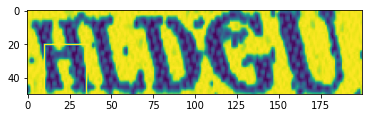

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image as array
# img_array = np.array([[1,2,3], [4,5,6], [7,8,9]])

# Plot the image
plt.imshow(img3)

# Show the plot
plt.show()


In [ ]:
# cv2.rectangle(img3, (2,7), (35,49), 0, 1)
cv2.rectangle(img3, pt1=(10,5), pt2=(35,50), color=(255,255,255), thickness=1)
# cv2.rectangle(img3, (35,20), (70,35), 0, 1)
# cv2.rectangle(img3, (70,20), (90,35), 0, 1)
# cv2.rectangle(img3, (90,20), (110,35),0, 1)
# cv2.rectangle(img3, (110,20),(130,35),0, 1)

array([[255, 253, 247, ..., 253, 253, 253],
       [253, 255, 251, ..., 251, 250, 251],
       [248, 254, 250, ..., 249, 246, 250],
       ...,
       [ 55, 122, 241, ..., 184, 144, 230],
       [ 61, 137, 234, ..., 143,  95, 224],
       [154, 188, 242, ...,  89,  77, 223]], dtype=uint8)

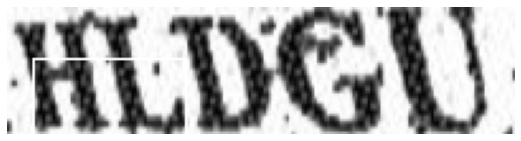

In [ ]:
plot_(img3)

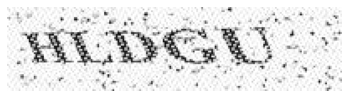

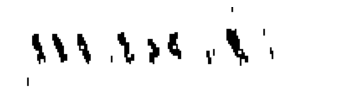

1/1 [==============================] - 0s 16ms/step
y
7
4
5
5
image.jpg


In [ ]:
get_demo('/content/resized_image.jpg')

In [ ]:
path3 = '/content/drive/MyDrive/resized_image.jpg'

In [ ]:
img2 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
from PIL import Image
import numpy as np

# Open the image
img = Image.open(path3)

# Convert PIL image to numpy array
img_data = np.array(img)

# Convert the data type of the numpy array to float
img_data = img_data.astype(np.float32)


In [ ]:
def plot_ (img1) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')

In [ ]:
from PIL import Image
import numpy as np

# Open the image
img = Image.open('/content/resized_image.jpg')

# Convert PIL image to numpy array
img_data = np.array(img)

# Convert the data type of the numpy array to float
img_data = img_data.astype(np.float32)


In [ ]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
path3 = '/content/drive/MyDrive/captcha/capctha.jpg'

In [ ]:
from PIL import Image

# Open the image
img = Image.open(path3)

# Resize the image
resized_img = img.resize((200, 50))

# Save the resized image to disk
resized_img.save('resized_image.jpg')

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread('/content/resized_image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(resul, cv2.COLOR_BGR2GRAY)



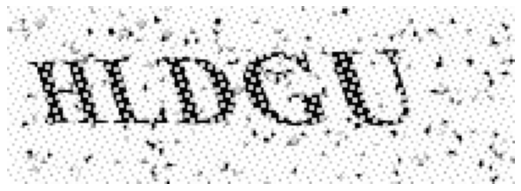

In [ ]:
plot_(gray)

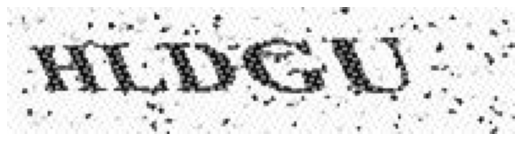

In [ ]:
import cv2

# # Load the image
# img = cv2.imread('image.jpg')

# # Convert to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur
kernel_size = (3,3)
blurred = cv2.GaussianBlur(gray, kernel_size, 0)

# Threshold the image
ret, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# Replace the background with white
result = cv2.addWeighted(gray, 0.7, thresh, 0.3, 0)
plot_(result)

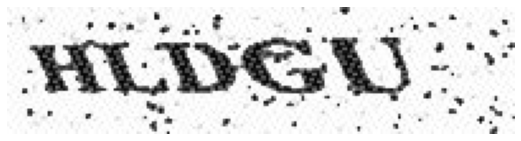

In [ ]:
import cv2

# # Load the image
# img = cv2.imread('image.jpg')

# # Convert to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur
kernel_size = (3,3)
blurred = cv2.GaussianBlur(result, kernel_size, 0)

# Threshold the image
ret, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# Replace the background with white
result1 = cv2.addWeighted(result, 0.7, thresh, 0.3, 0)
plot_(result1)

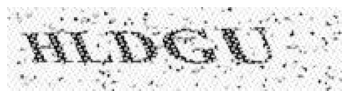

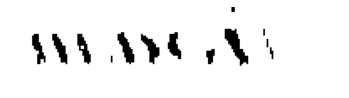

1/1 [==============================] - 0s 72ms/step
y
5
y
5
7
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
get_demo(gray)

In [ ]:
import cv2

# # Load the image
# img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply a Median filter
kernel = 3
blurred = cv2.medianBlur(gray, kernel)

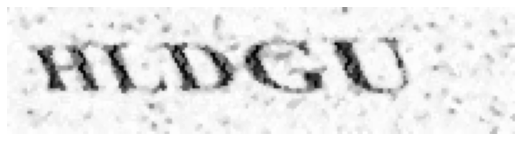

In [ ]:
plot_(blurred)

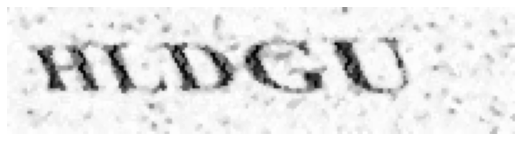

In [ ]:
import cv2

# Load the image
# img = cv2.imread('image.jpg')

# Blur the image
kernel_size = (5,5)
# blurred = cv2.GaussianBlur(img, kernel_size, 0)

# Subtract the blurred image from the original image
sharpened = cv2.addWeighted(blurred, 1.5, blurred, -0.5, 0)
sharpened1 = cv2.addWeighted(sharpened, 1.5, blurred, -0.5, 0)
plot_(sharpened1)

In [ ]:
import cv2

# Load the image
# img = cv2.imread('image.jpg')

# Apply the Laplacian operator
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=5)

# Add the original image and the Laplacian image
sharpened = cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)


In [ ]:
def get_demo (img) :
    
    # img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img[-9:])


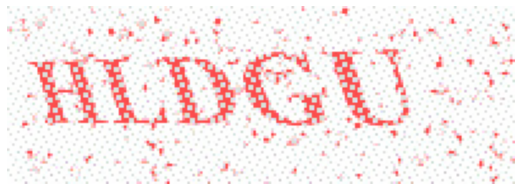

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/captcha/capctha.jpg')

# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract the value channel
value = hsv[:,:,2]

# Apply a Gaussian blur
kernel_size = (15,15)
blurred = cv2.GaussianBlur(value, kernel_size, 0)

# Threshold the image
ret, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# Replace the background with white
resul = cv2.addWeighted(img, 0.7, cv2.merge((thresh, thresh, thresh)), 0.3, 0)

plot_(resul)

